In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [3]:
data = pd.read_csv('FuelConsumption.csv')
data.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [4]:
data.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [6]:
features = data[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
features.head(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,9.9,6.7,8.5,196
1,2.4,4,11.2,7.7,9.6,221
2,1.5,4,6.0,5.8,5.9,136
3,3.5,6,12.7,9.1,11.1,255
4,3.5,6,12.1,8.7,10.6,244
5,3.5,6,11.9,7.7,10.0,230
6,3.5,6,11.8,8.1,10.1,232
7,3.7,6,12.8,9.0,11.1,255
8,3.7,6,13.4,9.5,11.6,267


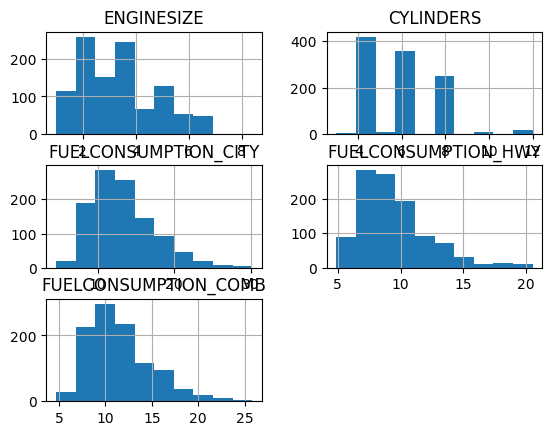

In [8]:
%matplotlib inline
vizualization = features[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB']]
vizualization.hist()
plt.show()

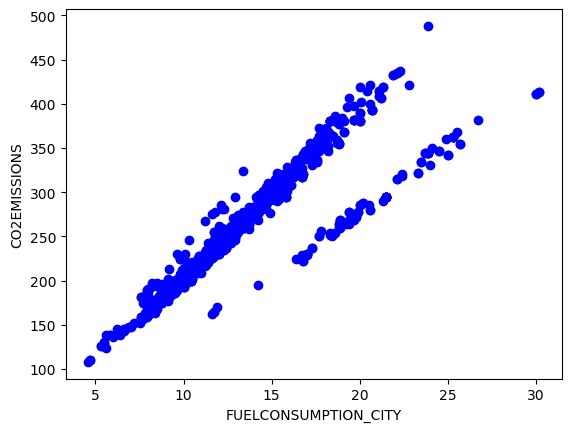

In [11]:
plt.scatter(features.FUELCONSUMPTION_CITY,features.CO2EMISSIONS,color = 'blue')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

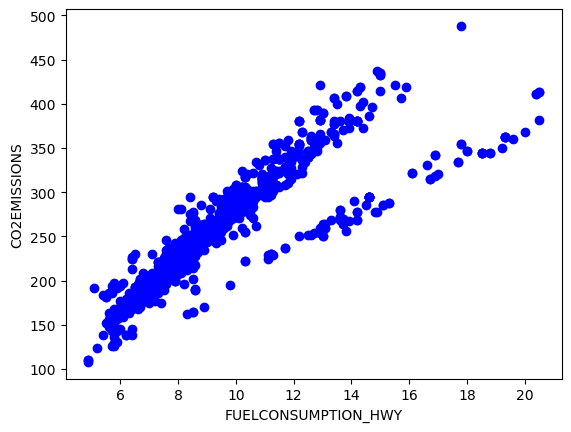

In [12]:
plt.scatter(features.FUELCONSUMPTION_HWY,features.CO2EMISSIONS,color = 'blue')
plt.xlabel("FUELCONSUMPTION_HWY")
plt.ylabel("CO2EMISSIONS")
plt.show()

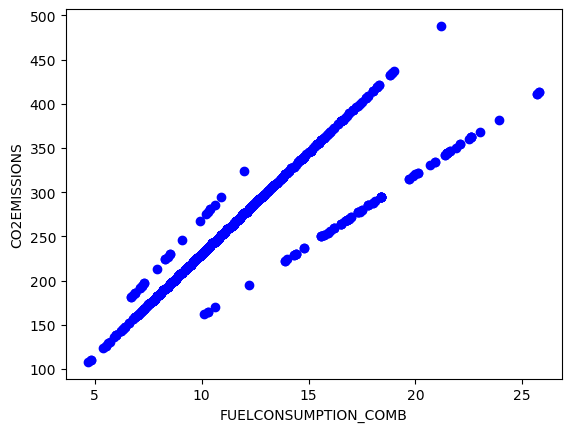

In [13]:
plt.scatter(features.FUELCONSUMPTION_COMB,features.CO2EMISSIONS,color = 'blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("CO2EMISSIONS")
plt.show()

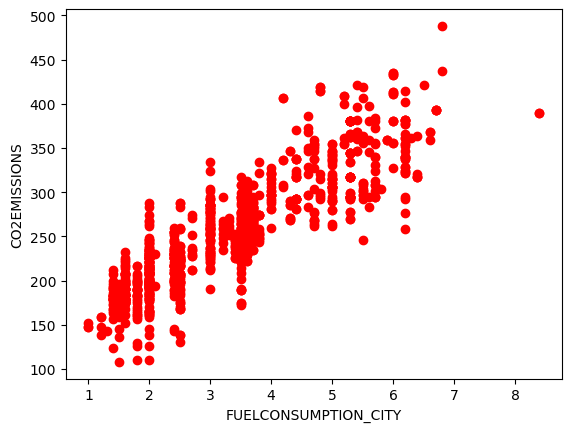

In [14]:
plt.scatter(features.ENGINESIZE,features.CO2EMISSIONS,color = 'RED')
plt.xlabel("FUELCONSUMPTION_CITY")
plt.ylabel("CO2EMISSIONS")
plt.show()

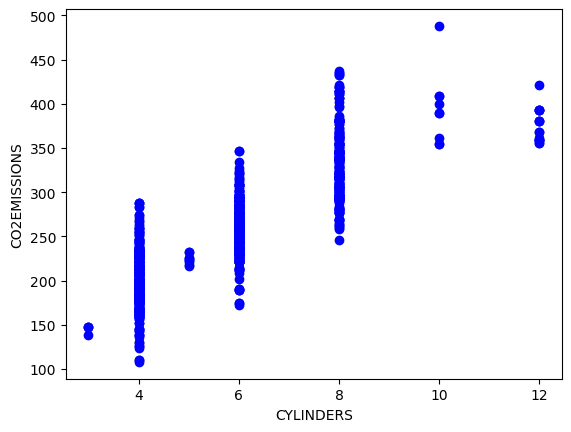

In [17]:
plt.scatter(features.CYLINDERS,features.CO2EMISSIONS,color = 'blue')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

In [22]:
X = features[['ENGINESIZE',	'CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY',	'FUELCONSUMPTION_COMB']]
X.head()
Y = features[['CO2EMISSIONS']]
Y.head()

,CO2EMISSIONS
0,196
1,221
2,136
3,255
4,244


In [31]:
#Creating train and test dataset
from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, Y, test_size=0.2, random_state=73)

In [32]:
print(train_X.shape)
print(test_X.shape)

(853, 5)
(214, 5)


In [33]:
train_X.head()

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB
568,5.0,8,15.6,10.9,13.5
52,4.2,8,15.3,10.9,13.3
912,5.7,8,16.3,11.5,14.1
875,3.4,6,11.6,8.3,10.1
412,2.5,4,10.5,7.0,8.9


In [34]:
#Linear Regression (univariate or simple Linear Regression)
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(train_X[['ENGINESIZE']],train_y)
print("Coefficients:  ",model.coef_)
print("Intercept: ",model.intercept_)

Coefficients:   [[39.23880389]]
Intercept:  [125.64826336]


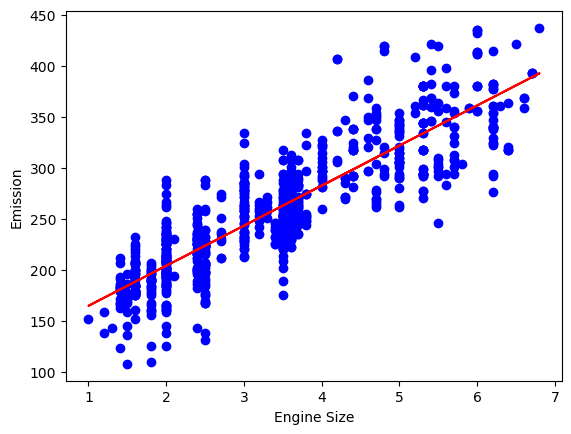

In [35]:
#Ploting of Enginesize and CO2Emission
#plotting Regression Line of both
plt.scatter(train_X.ENGINESIZE,train_y,color='blue')
plt.plot(train_X[['ENGINESIZE']],model.coef_[0][0]*train_X[['ENGINESIZE']]+model.intercept_[0],'r')
plt.xlabel("Engine Size")
plt.ylabel("Emission")
plt.show()

In [38]:
#Model Evaluation 
from sklearn.metrics import mean_absolute_error ,mean_squared_error,r2_score
model_y = model.predict(test_X[['ENGINESIZE']])
print("Mean Absolute Error: ",mean_absolute_error(test_y,model_y))
print("Mean Square Error: ",mean_squared_error(test_y,model_y))
print("R2-Score: ",r2_score(test_y,model_y))

Mean Absolute Error:  24.699460199924506
Mean Square Error:  1096.8751016470794
R2-Score:  0.7488545769303527


In [40]:
#Linear Regression (univariate or simple Linear Regression)
from sklearn import linear_model
model1 = linear_model.LinearRegression()
model1.fit(train_X[['CYLINDERS']],train_y)
print("Coefficients:  ",model1.coef_)
print("Intercept: ",model1.intercept_)

Coefficients:   [[29.52573092]]
Intercept:  [85.85920324]


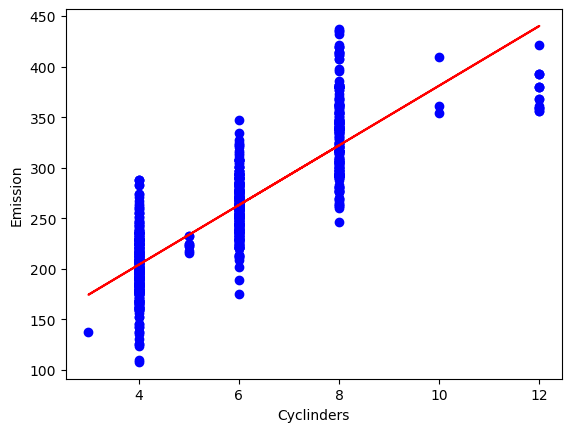

In [45]:
#Ploting of Cyclinders  and CO2Emission
#plotting Regression Line of both
plt.scatter(train_X.CYLINDERS,train_y,color='blue')
plt.plot(train_X[['CYLINDERS']],model1.coef_[0][0]*train_X[['CYLINDERS']]+model1.intercept_[0],'r')
plt.xlabel("Cyclinders")
plt.ylabel("Emission")
plt.show()

In [48]:
#Model1 Evaluation
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
model1_y = model1.predict(test_X[['CYLINDERS']])
print("Mean Absloute Error",mean_absolute_error(test_X[['CYLINDERS']],model1_y))
print("Mean Square Error",mean_squared_error(test_X[['CYLINDERS']],model1_y))
print("R2-Score",r2_score(test_X[['CYLINDERS']],model1_y))

Mean Absloute Error 249.01572028239906
Mean Square Error 64621.76490022223
R2-Score -20123.431137597763


In [51]:
#Simple Linear Regression for FUELCONSUMPTION_CITY and CO2EMISSIONS
model3 = linear_model.LinearRegression()
model3.fit(train_X[['FUELCONSUMPTION_CITY']],train_y)
print("Co-efficients: ",model3.coef_)
print("Intercept: ",model3.intercept_)

Co-efficients:  [[13.62922292]]
Intercept:  [75.15160132]


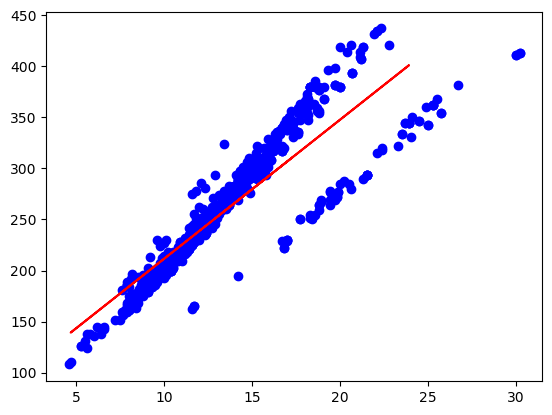

In [53]:
#Plotting of FUELCONSUMPTION_CITY and CO2EMISSION
#plotting of FUELCONSUMPTION_CITY and predicted
model3_y = model3.predict(test_X[['FUELCONSUMPTION_CITY']])
plt.scatter(train_X.FUELCONSUMPTION_CITY,train_y,color = 'b')
plt.plot(test_X[['FUELCONSUMPTION_CITY']],model3.coef_[0][0]*test_X[['FUELCONSUMPTION_CITY']]+model3.intercept_[0],color='r')
plt.show()

In [54]:
#Model Evaluation
print("Mean Absolute Error", mean_absolute_error(test_X[['FUELCONSUMPTION_CITY']],model3_y))
print("Mean Squared Error", mean_squared_error(test_X[['FUELCONSUMPTION_CITY']],model3_y))
print("R-2 Score", r2_score(test_X[['FUELCONSUMPTION_CITY']],model3_y))

Mean Absolute Error 238.87708327639757
Mean Squared Error 59623.409178421716
R-2 Score -3712.088857335083


In [55]:
train_X.columns

Index(['ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY',
       'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB'],
      dtype='object')

In [56]:
#Using for 'ENGINESIZE', 'CYLINDERS', 'FUELCONSUMPTION_CITY', FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB, 'CO2-Emission
#Linear Regression Multi-Variate 
multi_model = linear_model.LinearRegression()
multi_model.fit(train_X,train_y)
print("Co-effficients: ",multi_model.coef_)
print("Intercept: ",multi_model.intercept_)


Co-effficients:  [[ 11.75058898   6.8876405  -18.81882337 -16.61477253  44.52400849]]
Intercept:  [69.36977725]


In [57]:
predict = multi_model.predict(test_X)
#Model Evaluation
print("Mean Absolute Error :",mean_absolute_error(test_y,predict))
print("Mean Squared Error :",mean_squared_error(test_y,predict))
print("R2-Score",r2_score(test_y,predict))

Mean Absolute Error : 18.077282340666656
Mean Squared Error : 638.6465525097153
R2-Score 0.8537726324709385


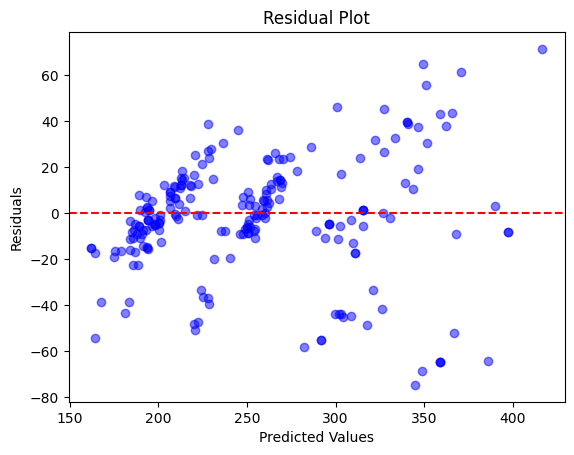

In [63]:
import matplotlib.pyplot as plt
# Compute residuals
residual = test_y - predict

# Plot residuals
plt.scatter(predict, residual, color='blue', alpha=0.5)
plt.axhline(y=0, color='red', linestyle='--')  # Reference line at y=0
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()
